<a href="https://colab.research.google.com/github/aga55-star/ORIE-4580-HW/blob/main/ORIE_4580_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ORIE 4580/5580/5581 Assignment 2

#### Students: A. Agarwal (aga55) and D. Fuentes (dwf64)

### Instructions


* Due Thursday September 11, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 4 and 6 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell. You can skip things that seem more advanced, like the Beta distribution in $Ch\, 4$ and the part on queueing in $Ch\,6$ - the part about paradoxes in probability is also strictly speaking not required$\ldots$(but I would never recommend *not* reading that!)

In [ ]:
#importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


---

---

## Question 1: Practice with expectation and variance (25 pts)



---


**(a)** Given a coin which comes up *Heads* with probability $p$, let $N_p$ denote the number of times the coin is tossed until the first *Heads*. Argue that $$N_p = \begin{cases} 1 & \text{with probability } p\\ 1+\tilde{N}_p & \text{with probability } 1-p \end{cases}$$
where $\tilde{N}_p$ is an independent random variable with the same distribution as $N_p$.
Using this, show that $\mathbb{E}[N_p] = 1/p$. Also use a similar argument to find $Var(N_p)$.

*Note: The rv $N_p$ is said to be a Geometric$(p)$ rv; it has pmf $p(k) = (1-p)^{k-1}p$.*



---



### Ans.

$$
N_p =
\begin{cases}
1, & \text{with prob. } p, \\[6pt]
1 + \widetilde{N}_p, & \text{with prob. } 1-p,
\end{cases}
$$

$$
\mathbb{E}[N_p] = p\cdot 1 + (1-p)\,\mathbb{E}[1+\widetilde N_p]
= p + (1-p)\bigl(1+\mathbb{E}[N_p]\bigr)
= 1 + (1-p)\mathbb{E}[N_p]
$$

$$
\mathbb{E}[N_p] - (1-p)\mathbb{E}[N_p] = 1
\;\Longrightarrow\;
p\,\mathbb{E}[N_p]=1
\;\Longrightarrow\;
\mathbb{E}[N_p]=\tfrac{1}{p}
$$

$$
\mathbb{E}[N_p^2] = p + (1-p)(1+2\mathbb{E}[N_p]+\mathbb{E}[N_p^2])
\;\;\Longrightarrow\;\;
\mathbb{E}[N_p^2] = \frac{1}{p} + \frac{2(1-p)}{p^2}.
$$

$$
\operatorname{Var}(N_p) = \mathbb{E}[N_p^2] - (\mathbb{E}[N_p])^2
= \frac{1-p}{p^2}.
$$


___

**(b)** In the previous assignment you estimated $\pi$ by sampling uniform random points $(X,Y)$ in $[-1,1]\times[-1,1]$, and checking if they fell within the circle. Suppose instead you sampled $n$ points uniformly in $[0,1]\times[0,1]$ and checked if $X^2+Y^2\leq 1$. Let $N_c$ be the number of points satisfying this; what is $\mathbb{E}[N_c]$ and $\text{Var}(N_c)$? Can you use this to get a better estimate of $\pi$ (i.e., with tighter confidence intervals given the same number of samples $n$)?

___

### Ans.

$$
p = \mathbb{P}(X^2+Y^2 \le 1)
= \frac{\text{area of quarter unit circle}}{\text{area of }[0,1]^2}
= \frac{\pi}{4}.
$$

$$
\mathbb{E}[N_c] = n p = \frac{n \pi}{4},
\qquad
\operatorname{Var}(N_c) = n p (1-p)
= n \cdot \frac{\pi}{4}\left(1 - \frac{\pi}{4}\right).
$$

$$
{\pi^{hat}} := 4 \frac{N_c}{n},
\qquad
\mathbb{E}[{\pi^{hat}}] = \pi,
\qquad
\operatorname{Var}({\pi^{hat}})
= \operatorname{Var}\!\left(4 \frac{N_c}{n}\right)
= \frac{16}{n} p (1-p)
= \frac{4\pi - \pi^2}{n}.
$$

Same variance as the $[-1,1]^2$ method, so no tighter confidence intervals.


---
**(c)** The elevators in Rhodes Hall stop at $6$ floors. Suppose one morning you get in on the ground floor with $3$ other people, and each one of you wants to go to a floor in $\{2,3,4,5,6\}$ chosen uniformly at random, and independently of the others' choices. At how many floors will the elevator stop on average?


---

### Ans.

$$
S = \text{number of distinct stops}.
$$


$$
S = \sum_{f=2}^6 \mathbf{1}\{\text{someone chose floor } f\}.
$$


$$
\mathbb{E}[S] = \sum_{f=2}^6 \mathbb{P}(\text{someone chose } f).
$$


$$
\mathbb{P}(\text{someone chose } f)
= 1 - \left(1 - \tfrac{1}{5}\right)^4
= 1 - \left(\tfrac{4}{5}\right)^4.
$$

$$
\mathbb{E}[S]
= 5 \left(1 - \left(\tfrac{4}{5}\right)^4 \right)
= \frac{369}{125}
\approx 2.952.
$$



---

(d) For your next simulation homework, you pair up with a student you have not met before. At some point, you get bored of the homework, and decide to count how many common friends you have at Cornell. Suppose the total number of students at Cornell is $22,000$, out of which you have $500$ friends, and your homework partner has $440$. Assuming that for both of you, your friends form independent and uniform random samplings of the total student population, what is the expected number of friends you both have in common?

---

### Ans.
  
$$
I_j =
\begin{cases}
1 & \text{if student $j$ is a friend of both}, \\
0 & \text{otherwise}.
\end{cases}
$$

$$
|A \cap B| = \sum_{j=1}^N I_j.
$$


$$
\mathbb{E}[|A \cap B|] = \sum_{j=1}^N \mathbb{E}[I_j].
$$


$$
\mathbb{E}[I_j] = \mathbb{P}(j \in A \cap B)
= \mathbb{P}(j \in A)\,\mathbb{P}(j \in B).
$$


$$
\mathbb{P}(j \in A) = \frac{500}{22{,}000},
\qquad
\mathbb{P}(j \in B) = \frac{440}{22{,}000}.
$$


$$
\mathbb{P}(j \in A \cap B)
= \frac{500}{22{,}000}\cdot \frac{440}{22{,}000}.
$$


$$
\mathbb{E}[|A \cap B|]
= N \cdot \frac{500}{22{,}000}\cdot \frac{440}{22{,}000}.
$$

$$
\mathbb{E}[|A \cap B|]
= \frac{500 \cdot 440}{22{,}000}
= 10.
$$




___
___

## Question 2: Pooled Testing (30 pts) ##


In 2020 Fall, Cornell adopted pooled testing to test a large population with a limited number of Covid tests. In pooled testing a sample is taken from each person and split into two subsamples. The first subsample from each person is pooled with those of $n-1$ other people into a single pooled sample of size $n$ people. (Cornell eventually used $n=5$.) If the pooled test comes back negative, then we declare all $n$ people in the pool to be
negative. If the pooled test comes back positive, we then individually test the second subsample from every person in the pool. In this question we'll explore the effects of different pool sizes $n$.

---

**(a)** The *prevalence* $p$ at the time of testing is defined to be the true fraction of people with Covid in the population. Now let $N$ be the number of (true) Covid-positive people in a pool of size $n$. What would you use as a model for the distribution of $N$, if you knew the $n$ people in the pool $(i)$ had never met each other in the last week, and $(ii)$ all lived in the same house. In each case, what is the mean and variance of $N$?

---

### Ans.

**(i) Never met each other**  
Model
$$
N \sim \mathrm{Binomial}(n,p)
$$

$$
\mathbb{E}[N]=np,
\qquad
\operatorname{Var}(N)=np(1-p).
$$

**(ii) Same household (positive dependence):**

Assume each of the n Bernoulli trials has pairwise correlation $(\rho \ge 0)$ because if one housemate is positive, the others are more likely to be positive too. We can modify our model from Binomial to Correlated Binomial.

$$
\mathbb{E}[N] = np,
\qquad
\operatorname{Var}(N) = np(1-p)\,\bigl(1 + (n-1)\rho \bigr).
$$



___

**(b)** Suppose that the test has no *false positives* and no *false negatives*; it comes back positive if **anyone** in the pool is positive and comes back negative if all people in the pool are negative. Let $T$ be the number of tests you need to be *sure* of each persons status (i.e., if they are COVID positive or not). What is the distribution of $T$, and what is its mean and variance? Clearly state all assumptions you are making.

---

### Ans.

Let
$$
q \;:=\; \mathbb{P}(\text{pooled positive}) \;=\; 1-\mathbb{P}(\text{all negative}) \;=\; 1-(1-p)^n.
$$


Define
$$A=\mathbf{1}\{\text{pooled positive}\}\sim\mathrm{Bernoulli}(q)$$.

**Distribution of \(T\):**  

$$
T \;=\; 1 + nA.
$$

$$
T=
\begin{cases}
1, & \text{with prob. } (1-p)^n,\\[4pt]
1+n, & \text{with prob. } 1-(1-p)^n.
\end{cases}
$$

**Expected value (work):**
$$
\mathbb{E}[T]=\mathbb{E}[\,1+nA\,]=1+n\,\mathbb{E}[A]=1+nq
=1+n\Bigl(1-(1-p)^n\Bigr).
$$

**Variance (work):**
Since \(T=1+nA\) and $\operatorname{Var}(cX)=c^2\operatorname{Var}(X)$,
$$
\operatorname{Var}(T)=n^2\,\operatorname{Var}(A)
=n^2\,q(1-q)
= n^2\Bigl(1-(1-p)^n\Bigr)(1-p)^n.
$$



___

**(c)** What is the pool size $n$ that minimizes the average number of tests per person when the prevalence is $0.0001$? What about when prevalence is $0.01$? You should do this numerically using plots (i.e., without calculus), as this is helps explain your recommendation to decision-makers (note though that you may want to test different ranges of $n$ for each setting).

---

### Ans.



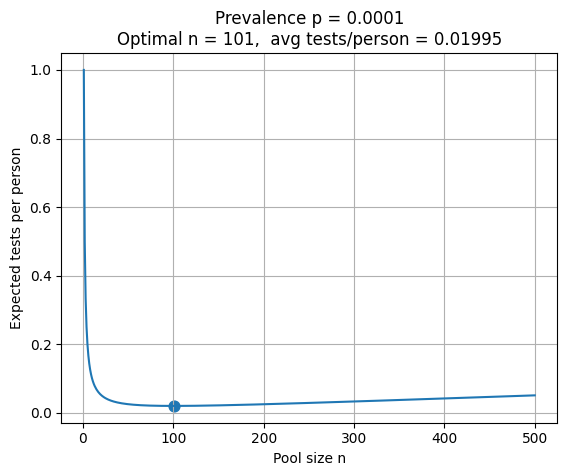

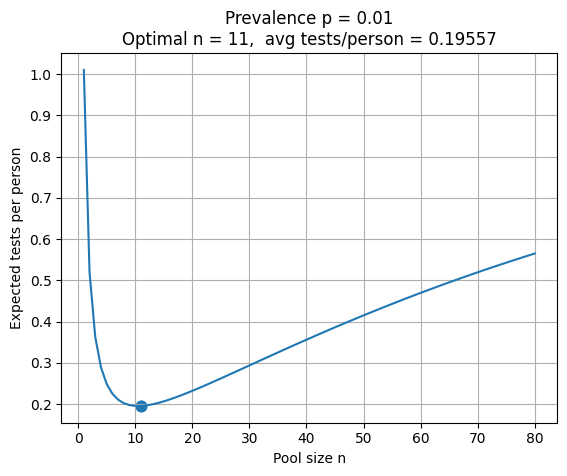

p = 0.0001: optimal n = 101,  expected tests/person = 0.019950656341507167
p = 0.01: optimal n = 11,  expected tests/person = 0.19557083665037445


In [ ]:
# E[T]/n = 1/n + 1 - (1 - p)**n
def per_person_tests(n, p):
    n = np.asarray(n, dtype=float)
    return 1.0/n + 1.0 - (1.0 - p)**n

def sweep_and_plot(p, n_max, title):
    n_vals = np.arange(1, n_max + 1)
    y = per_person_tests(n_vals, p)
    k = int(np.argmin(y))
    n_opt = int(n_vals[k])
    y_opt = float(y[k])

    plt.figure()
    plt.plot(n_vals, y)
    plt.scatter([n_opt], [y_opt], s=60)
    plt.title(f"{title}\nOptimal n = {n_opt},  avg tests/person = {y_opt:.5f}")
    plt.xlabel("Pool size n")
    plt.ylabel("Expected tests per person")
    plt.grid(True)
    plt.show()

    return n_opt, y_opt


p1 = 0.0001
p2 = 0.01

n_opt1, y_opt1 = sweep_and_plot(p1, n_max=500, title="Prevalence p = 0.0001")
n_opt2, y_opt2 = sweep_and_plot(p2, n_max=80,  title="Prevalence p = 0.01")

print(f"p = {p1}: optimal n = {n_opt1},  expected tests/person = {y_opt1}")
print(f"p = {p2}: optimal n = {n_opt2},  expected tests/person = {y_opt2}")




---

*(d)* A more critical characteristic of pooled tests is the false negative rate, which is the probability that a test comes back negative when at least one person in the pool is Covid positive. False negatives are dangerous, because the person (or people) with Covid in the pool can infect others until Covid is otherwise detected or they become no longer infectious.

You know that false negatives must be more likely when there is a low viral load in a sample. To understand how to model false negatives in PCR tests, you consult with your friend who is a biologist, who tells you that the viral load $V$ in a PCR sample is measured using something called the cycle threshold (CT) score of a PCR test, which is equivalent to $C = -\log_2 V$. The viral load for a Covid-negative person is $V=0$. In a pooled sample of size $n$, each person contributes a fraction $1/n$ of the sample, and the resulting viral load has a total CT score of:
$$-\log_2 \left(\frac 1 n \sum_{i=1}^n 2^{-C_i}\right),$$
where $C_1, C_2, \ldots, C_n$ are the CT scores of each person in the pool. Finally, your friend recalls that probability $\mathbb{P}[\text{false negative test}|C]$ of a false negative in a single PCR test is well modeled either as
$\frac{1}{1 + \exp(-10(C - 35))}$ or $\frac{1}{1 + \exp(10(C - 35))}$ (but he can not remember which one 🙁).

Can you figure out what the correct model is?

---



### Ans.


$$
\mathbb{P}(\text{false negative}\mid C)\in
\left\{
\frac{1}{1+\exp(-10(C-35))}, \;
\frac{1}{1+\exp(10(C-35))}
\right\}.
$$

$$C=-\log_2 V$$  
High $C$ = low viral load ⇒ false negatives should be more likely.  
So the probability must increase with $C$.

**Check Extreme Values:**

Low \(C=20\) (high viral load, want small FN rate):  
  $$
  \frac{1}{1+\exp(-10(20-35))} \approx 0 \quad (\text{good})
  $$
  $$
  \frac{1}{1+\exp(10(20-35))} \approx 1 \quad (\text{bad})
  $$

High \(C=40\) (low viral load, want large FN rate):  
  $$
  \frac{1}{1+\exp(-10(40-35))} \approx 1 \quad (\text{good})
  $$
  $$
  \frac{1}{1+\exp(10(40-35))} \approx 0 \quad (\text{bad})
  $$

$$
{\;\mathbb{P}(\text{false negative}\mid C)=\frac{1}{1+\exp(-10(C-35))}\;}
$$




---


*(e)* You consult the epidemiology literature and find that the viral load for a Covid-positive person has been found from data to have a CT score $C$ that is well modeled via a *mixture of Gaussian* distribution as follows: with probability $0.40$, $C$ is ${N}(20, 3.5^2)$ (i.e., normally distributed with mean 20 and variance $3.5^2$); with probability $0.5$, $C$ is ${N}(30, 3^2)$, and otherwise,  $C$ is ${N}(34.78, 1.32^2)$.

Use this data with the above model to estimate the probability of a false negative in a pooled test of size $n$ containing a single Covid-positive person as a function of $n$. You'll need to generate, say, $m$ replications of the pooled test at each value of $n$, where you should choose $m$ to ensure that your results are meaningful. Report your results as a graph with the false negative rate on the $y$-axis and the pool size $n$ ranging from 1 to 50 on the $x$-axis. Select your simulation runlength so that your estimates would be useful in practice (for example, estimates that are $\pm$ 0.02 or so are sufficiently accurate).


---


### Ans.



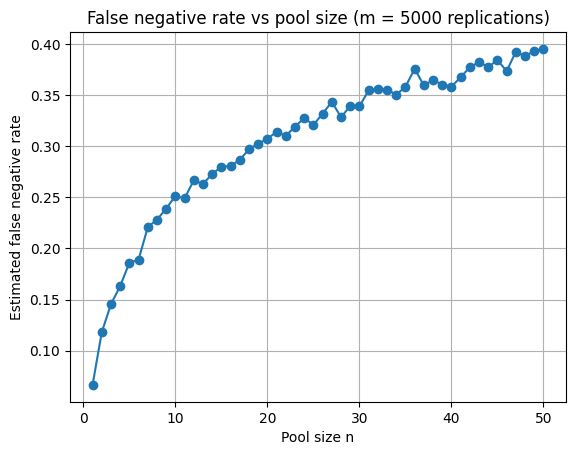

n=1: FN rate ≈ 0.06645108693867584
n=5: FN rate ≈ 0.1859400770751568
n=10: FN rate ≈ 0.25131204074051905
n=20: FN rate ≈ 0.3074329693344024
n=30: FN rate ≈ 0.33903614098385504
n=40: FN rate ≈ 0.35835897069928746
n=50: FN rate ≈ 0.3952703784700996


In [ ]:
n_min, n_max = 1, 50
m = 5000

weights = [0.40, 0.50, 0.10]
means   = [20.0, 30.0, 34.78]
stds    = [ 3.5,  3.0,  1.3]

def sample_ct():
    u = np.random.rand()
    if u < weights[0]:
        k = 0
    elif u < weights[0] + weights[1]:
        k = 1
    else:
        k = 2
    return np.random.normal(means[k], stds[k])

def fn_prob(C):
    return 1.0 / (1.0 + np.exp(-10.0 * (C - 35.0)))

ns = list(range(n_min, n_max + 1))
fn_rates = []


for n in ns:
    total = 0.0
    for _ in range(m):
        C_single = sample_ct()
        C_pooled = C_single + np.log2(n)   # pooled CT shifts by log2(n)
        total += fn_prob(C_pooled)
    fn_rates.append(total / m)


plt.plot(ns, fn_rates, marker='o')
plt.xlabel("Pool size n")
plt.ylabel("Estimated false negative rate")
plt.title(f"False negative rate vs pool size (m = {m} replications)")
plt.grid(True)
plt.show()


for n_check in [1, 5, 10, 20, 30, 40, 50]:
    print(f"n={n_check}: FN rate ≈ {fn_rates[n_check-1]}")


## Question 3: Buffon and his magic needle (20 points)

In the first class we saw Buffon's needle experiment in which we drop needles of length 1 on a floor of parallel lines that are equally spaced 1 unit apart. If we drop $n$ needles and $N_{cross}$ of them cross a line, then an estimate of $\pi$ is $\hat{\pi}_n = 2n/N_{cross}$. We will now study how this works in practice (feel free to use the code provided in class).


---

**(a)** For a range of values of $n$ between $10$ and $10,000$, perform $30$ replications of the Buffon needle experiment. For each value of $n$ you test, plot the average of the $30$ estimates $\hat{\pi}_n = 2n/N_{cross}$ and a 95\% confidence interval for the expected value of $\hat{\pi}_n$. You should only be making one plot, with $n$ on the $x$-axis, and estimates and CIs on the $y$-axis.



---



### Ans.

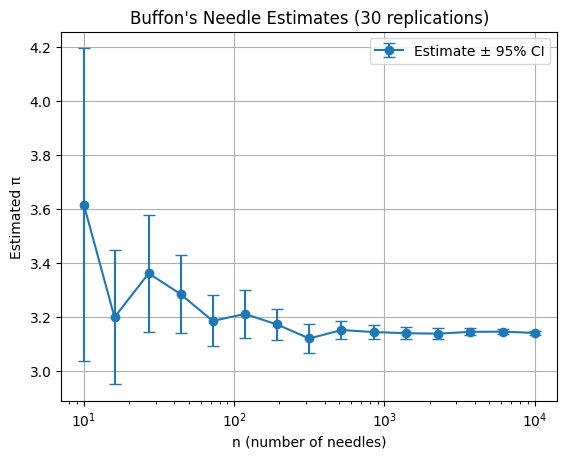

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def buffon_pi(n):
    d = np.random.rand(n) * 0.5
    theta = np.random.rand(n) * (np.pi/2)
    crosses = np.sum(d <= 0.5 * np.sin(theta))
    if crosses == 0:
        return np.nan
    return 2*n / crosses

n_values = np.unique(np.round(np.logspace(1, 4, 15)).astype(int))
reps = 30

means = []
lowers = []
uppers = []

for n in n_values:
    estimates = []
    for r in range(reps):
        estimates.append(buffon_pi(n))
    estimates = np.array(estimates)
    mean_est = np.mean(estimates)
    se = np.std(estimates, ddof=1) / np.sqrt(reps)  # standard error
    ci = 1.96 * se
    means.append(mean_est)
    lowers.append(mean_est - ci)
    uppers.append(mean_est + ci)

plt.errorbar(n_values, means, yerr=[np.array(means)-np.array(lowers),
                                    np.array(uppers)-np.array(means)],
             fmt='o-', capsize=4, label="Estimate ± 95% CI")
plt.xscale("log")
plt.xlabel("n (number of needles)")
plt.ylabel("Estimated π")
plt.title("Buffon's Needle Estimates (30 replications)")
plt.legend()
plt.grid(True)
plt.show()



---

**(b)** You may notice from your plot in part (a) that the estimator $\hat{\pi}_n$ has some *bias*, i.e., $\mathbb{E}[\hat{\pi}_n] \neq \pi$ (this may be more apparent for small values of $n$). Pick a small value (say, $n=100$), and do more replications (i.e., do multiple experiments, where in each experiment you throw $100$ needles), and determine if $\hat{\pi}_n$ is an overestimate or underestimate for $\pi$.


---


### Ans.

In [ ]:
n = 100
reps = 1000000

estimates = []
for r in range(reps):
    estimates.append(buffon_pi(n))
estimates = np.array(estimates)
mean_est = np.mean(estimates)

print(f"Estimated π for n={n}: {mean_est}")

Estimated π for n=100: 3.1599072337457113


It is an overestimate for $\pi$

**(c)** Can you mathematically justify your observation from part (b)?

### Ans.

Probability that each needle crosses:
$$
p = \frac{2}{\pi}, \qquad N \sim \text{Binomial}(n,p).
$$

Estimator:
$$
\hat{\pi}_n = \frac{2n}{N}.
$$

The function $\varphi(x)=1/x$ is convex for $x>0$, so by Jensen’s inequality
$$
\mathbb{E}\!\left[\frac{1}{N}\right] \;\ge\; \frac{1}{\mathbb{E}[N]}.
$$


$$
\mathbb{E}[\hat{\pi}_n]
= 2n \,\mathbb{E}\!\left[\tfrac{1}{N}\right]
\;\ge\; 2n \cdot \frac{1}{np}
= \frac{2}{p}
= \pi.
$$

The estimator $\hat{\pi}_n$ is *biased upward*, so on average it overestimates $\pi$.


**(d)** Note however that you can still use Buffon's experiment to get an estimate with $95$\% confidence intervals for $\mathbb{E}[\frac{N_{\text{cross}}}{n}]$. Using this, can you get a $95$\% confidence interval for $\pi$? (Note: this need not be symmetric about $\pi$).

### Ans.

First get a 95% CI for the mean number of crossings, then invert to get a CI for $\pi$.

Let $N_{\text{cross}}$ be the # of crossings in one experiment with $n$ needles. Run $R$ replications and record $N_1,\dots,N_R$. Compute

$$
\bar N=\frac{1}{R}\sum_{r=1}^R N_r,
\qquad
s=\sqrt{\frac{1}{R-1}\sum_{r=1}^R (N_r-\bar N)^2}
$$

95% CI for $\mathbb{E}[N_{\text{cross}}]$:

$$
[L_\mu, U_\mu] \;=\; \bar N \pm 1.96\,\frac{s}{\sqrt{R}}.
$$

Since $\displaystyle \pi=\frac{2n}{\,\mathbb{E}[N_{\text{cross}}]\,}$ and $x\mapsto \frac{2n}{x}$ is decreasing, the 95% CI for $\pi$ is

$$
\;\left[\;\frac{2n}{U_\mu}\;,\;\frac{2n}{L_\mu}\;\right]\;
$$



**(e) (Optional for everyone!)** Try to convince yourself (by linearity of expectation), that

(i) If you randomly throw $n$ matches of length $\ell$ and let $N^{\ell}_{\text{cross}}$ be a count of how many times these cross the lines, then $\frac{\mathbb{E}[N^{\ell}_{\text{cross}}]}{\ell} = $ constant (in other words, the expected number of crossings is proportional to $\ell$). Note: if $\ell>1$, each match may cross multiple lines.

(ii) The above result remains true if you throw *any* line segment (with any shape) of length $\ell$. Using this, can you see an easy way to compute $\mathbb{E}[N^{1}_{\text{cross}}]$ (i.e., the probability of a match crossing a line in the original experiment)?

## Question 4: Overbooking (25 points)

A website called Tixmaster is in charge of selling tickets for an upcoming Taylor Swift concert in Ithaca. The concert will take place in the State Theater, which has an official capacity of $1500$ seats. You believe however that Tixmaster has sold $1600$ tickets (representatives of the company, when contacted, denied this$\ldots$).

The show starts at 7pm, and if a ticket holder hasn't shown up by that time, then they are not allowed to enter anymore so as to not disturb the other attendees. From experience, you believe that there is a 95\% chance that someone who has bought a ticket actually shows up by 7pm. and that people show up (or not) independently from one another.



---

**(a)** You wait inside the State Theater and count the number of people entering. What is the probability that you will be able to prove that Tixmaster is overbooking? (You can do this with or without simulation)


---

### Ans.
Let $X$ = the number of ticket holders who show up to the concert

$$
X \sim \text{Binomial}(n=1600, p=0.95)
$$

$$
\mu = np = 1600 \times 0.95 = 1520
$$

$$
\sigma = \sqrt{np(1-p)} = \sqrt{1520 \times 0.05}
   = 8.717797887 \approx 8.7178
$$

$$
P(X \geq 1501) = 1 - P(X \leq 1500)
$$

$$
z = \frac{1500.5 - \mu}{\sigma}
   = \frac{1500.5 - 1520}{8.7178}
   = -2.236802863 \approx -2.2368
$$

$$
P(Z \leq -2.2368) \approx 0.01265
$$

$$
P(X \geq 1501) \approx 1 - 0.01265 \approx 0.98735
$$

<br> With 1600 ticket sold with a 95% rate of showing up, there is about a 98.7% chance you will see more than 1500 entries. Therefore, you will be able to prove Tixmaster is overbooking by counting entries.

**(b)** You manage to catch Tixmaster overbooking this time, and to prevent it in future, you decide to impose a fine to try and disincentivize overbooking. You know Tixmaster earns 100 in profit for every ticket sold (whether the holder shows up or not). You again have an agent counting how many people show up to the concert by $7$pm (you can not see how many are late or no-shows), and can charge Tixmaster a fine of 500 for each person exceeding the capacity.

Use a simulation to estimate how many extra tickets (over 1600) Tixmaster will sell, if they are trying to maximize their expected profit (after paying any fines).

### Ans.

In [ ]:
p = 0.95
cap = 1500
base_tickets = 1500
extra_tickets = 200
sims = 20000
rng = np.random.default_rng(42)

results = []

for k in range(extra_tickets + 1):
    n = base_tickets + k
    shows = rng.binomial(n, p, size=sims)
    profit = n * 100 - 500 * np.maximum(0, shows - cap)
    expected_profit = profit.mean()
    results.append((k, n, expected_profit))

df = pd.DataFrame(results, columns=["extra_tickets", "total_sold", "expected_profit"])

best = df.loc[df["expected_profit"].idxmax()]
print(f"Best number of extra tickets to sell: {int(best['extra_tickets'])}")
print(f"Total tickets: {int(best['total_sold'])}")
print(f"Estimated expected profit: ${best['expected_profit']:.2f}")

df.sort_values("expected_profit", ascending=False).head(10)

Best number of extra tickets to sell: 71
Total tickets: 1571
Estimated expected profit: $156673.95


,extra_tickets,total_sold,expected_profit
71,71,1571,156673.950
72,72,1572,156664.575
73,73,1573,156656.050
70,70,1570,156655.475
69,69,1569,156628.025
74,74,1574,156609.100
68,68,1568,156580.375
75,75,1575,156579.225
67,67,1567,156529.750
76,76,1576,156490.275




---



**(c) (For 5580/5581 students; optional for 4580)** Finally, you decide to stamp down on any overbooking by setting a large enough penalty so that Tixmaster does not find it profitable to sell even one extra ticket. Use simulation to find a fee $F$ charged per person over $1600$ admitted to the theater, such that it stops overbooking for each person who book after the number tickets sold exceed the capacity. (Ideally, try to propose as small an $F$ as possible, so that the city government feels it is practical to implement).

*(Note: This sort of a problem where you want to optimize a parameter via simulation is difficult. We will see some ways to do this more efficiently later in class; however, for this problem, it is easy to do a search over potential values of $F$ to find the first time that overbooking by even $1$ ticket becomes unprofitable.)*


---



### Ans.